In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(5)
num_simulacoes = 100
num_iteracoes = 80
num_individuos = 1000
capital_inicial = 10
binwidth = 20
rangemax = 10000
numbins = int(rangemax/binwidth)
binwidth = rangemax/numbins

In [3]:
capital = np.zeros([num_individuos])
capital_hist = np.zeros(numbins)
binedge = np.zeros(numbins + 1)

for i in range(num_simulacoes):
    capital.fill(capital_inicial)
    talento = np.random.normal(0.6, 0.1, num_individuos)
    
    for i in range(num_iteracoes):

        for i, individuo in enumerate(capital):
            evento = np.random.rand()
            #evento ruim
            if evento < 0.05:
                capital[i] /= 2
            elif evento < 0.10:
                if evento < talento[i]:
                    capital[i] *= 2
    hist, binedge_ = np.histogram(capital, bins = numbins, range = (0, rangemax)) 
    binedge += binedge_
    capital_hist += hist

capital_hist /= num_simulacoes
binedge /= num_simulacoes


/home/yamishady/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


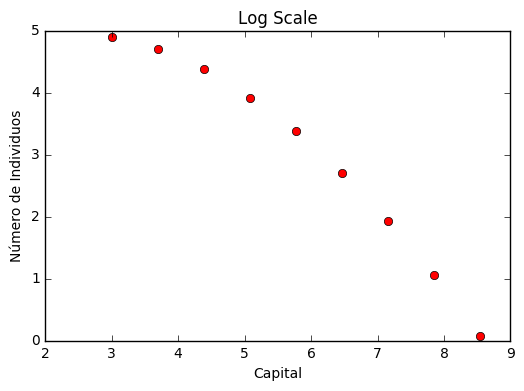

In [4]:
x = np.linspace(0, np.amax(binedge), numbins)
plt.plot(np.log(x), np.log(capital_hist), 'ro')
plt.title("Log Scale")
plt.xlabel("Capital")
plt.ylabel("Número de Individuos")
plt.show()

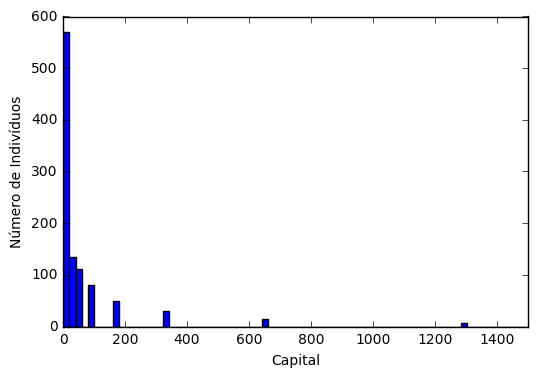

In [6]:
x = np.linspace(0, rangemax, numbins)
plt.bar(x, capital_hist, width = binwidth)
plt.xlim(0,1500)
plt.xlabel("Capital")
plt.ylabel("Número de Indivíduos")
plt.show()